<a href="https://colab.research.google.com/github/Fezzahraoui/Biowin-vs-ML-project/blob/main/EE8603_ML_project_Biowin_vs_ML_Ammonia_FEZZAHRAOUI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks vs. Biowin as a Mechanistic Tool: A Study on Predictive Accuracy in Wastewater treatment Systems

---

In [ ]:
!lscpu
#know the type of CPU allocated to this Colab notebook

Architecture:            x86_64
  CPU op-mode(s):        32-bit, 64-bit
  Address sizes:         46 bits physical, 48 bits virtual
  Byte Order:            Little Endian
CPU(s):                  2
  On-line CPU(s) list:   0,1
Vendor ID:               GenuineIntel
  Model name:            Intel(R) Xeon(R) CPU @ 2.20GHz
    CPU family:          6
    Model:               79
    Thread(s) per core:  2
    Core(s) per socket:  1
    Socket(s):           1
    Stepping:            0
    BogoMIPS:            4399.99
    Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clf
                         lush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_
                         good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fm
                         a cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hyp
                         ervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd i

In [ ]:
!w

 07:16:38 up 55 min,  0 users,  load average: 3.11, 3.10, 2.84
USER     TTY      FROM             LOGIN@   IDLE   JCPU   PCPU WHAT


# Content

* [1. Task Description](#0)
    * [1.1. Introduction ](#0.1)    
    * [1.2. ???? ](#0.2)    
    * [1.3. Active Sludge (AS) Biological Nutrient Removal (BNR) ](#0.3)    
* [2. Install Python packages](#1)
    * [2.1. Install Packages](#1.1)    
    * [2.2. A List of Python Packages](#1.2)
    * [2.3. Import Packages](#1.3)
    * [2.4. Create Folders](#1.4)
* [3. Download Data](#2)
* [4. Preprocess Data](#3)        
    * [4.1. Exploratory Data Analysis](#3.1)
    * [4.2. Feature variables and target variable](#3.2)
    * [4.3. Train/Test Split](#3.3)
* [5. Build and Train a Model](#4)  
    * [5.1. Linear regression model](#4.1)
    * [5.2. Deep learning](#4.2)


    


<a id='0'></a>
# Part 1. Task Description

<a id='1.1'></a>
## 1.1. Introduction

Introduction and literature review:
Wastewater management is a vital component of public health and environmental protection, as it eliminates water pollution,  pathogens, excess nutrients, and toxic chemicals. Globally, over 80% of sewage is released either in untreated or inadequately treated forms, hence the urgent need for an improvement in sewage treatment methods that could positively impact human health and environmental conservation. One of the pressing global issues is the increasing demand for potable water, driven primarily by population growth, climate change, elevating living standards, and the deterioration of water quality. The advantages of recycling domestic wastewater are dual-pronged: firstly, it prevents the release of raw sewage into nature, which contaminates water bodies; and secondly, it helps reduce the need for freshwater, especially in industry and agriculture. The presence of high nutrient levels in the effluent can harm water quality and the environment. High pollutant levels, namely nitrogen, can cause algae blooms, which block sunlight from underwater ecosystems, leading to ecological damage. These blooms may also foster harmful algae and bacteria growth, decreasing oxygen levels in the water, and ending aquatic life. For agricultural use, excess nitrates can leach into the soil, contaminating groundwater. In wastewater treatment plants (WWTPs), high nitrate levels can lead to 'rising sludge,' where nitrogen gas accumulates and causes sludge to escape with the effluent. In the WWTPs, nitrogen removal involves nitrification, which converts ammonia to nitrate, and denitrification, which converts nitrate to nitrogen gas under low-oxygen conditions. Predicting ammonia and nitrate levels could help optimize oxygen supply to the reactors, maintaining the treatment process's efficiency [1][2][3].
Amidst this backdrop, the integration of mathematical modeling into wastewater treatment processes presents an innovative avenue for advancing the field. Mechanistic and data-driven modeling have been employed to detect operational abnormalities in WWTPs and help manage effluent quality. Traditional mechanistic models rely on establishing fundamental physical, biological, and chemical relationships that exist between the system components, which could be linear, non-linear, feedback loops, differential equations, etc. While these models are instrumental in understanding and predicting system behaviors, they often require deep knowledge of system dynamics and can be limited by the complexity and variability of wastewater treatment processes. In contrast, Machine Learning Algorithms (MLAs) offer a flexible and data-driven approach, capable of capturing complex patterns without the need for explicit system modeling.
This study examines the synergy between mechanistic and ML approaches, exploring their combination potential to lead to more accurate, cost-effective, and efficient wastewater treatment solutions. Machine Learning Algorithms (MLAs) like Recurrent Neural Networks (RNN) are highly effective in predicting the behavior of wastewater treatment plants, thanks to their unique capability to integrate the concept of "yesterday, today, and tomorrow" which account for the influence the past and present conditions on the future effluent quality. This temporal understanding enables these algorithms to make more accurate and reliable predictions about the treatment plant's performance, ensuring better management and optimization of wastewater treatment processes.
The potential of ML, particularly in the form of Recurrent Neural Networks (RNN) and Long Short-Term Memory (LSTM) networks, lies in their ability to understand temporal sequences, effectively considering past and present data to predict future outcomes. This feature is particularly relevant in wastewater treatment, where the influence of past and present conditions plays a crucial role in determining effluent quality.
Linear Regression, a fundamental statistical technique for predictive analysis, serves as the baseline model in this study. Its simplicity and interpretability make it a common starting point in predictive modeling. However, its effectiveness is often limited in complex, non-linear systems like wastewater treatment plants. On the other hand, Simple RNNs, a form of neural networks specifically designed for handling sequential data, provide a more nuanced approach by considering the temporal dependencies in the data. They are particularly adept at modeling time-series data, making them suitable for predicting dynamic changes in wastewater quality. LSTM networks, an advanced form of RNNs, further enhance this capability by addressing the limitations of traditional RNNs, such as the vanishing gradient problem, thereby allowing the model to learn from long-term dependencies more effectively.

The novelty of this study lies in its comprehensive approach – comparing the efficacy of these diverse modeling techniques using a dataset generated from the BioWin 6.2 simulation tool. This sets the stage for future research to explore hybrid models that blend mechanistic understanding with ML's data-driven insights, holding the promise of enabling real-time optimization and significantly reducing environmental impacts.

ML models, particularly simple RNN and LSTM networks, have shown increasing promise. According to recent studies, LSTM models have been increasingly applied in predicting effluent quality and operational parameters, showcasing significant improvements in prediction accuracy compared to traditional models [XX].This trend highlights a growing recognition of the potential of advanced ML techniques in environmental engineering, marking a shift towards more data-driven, intelligent wastewater treatment solutions [XX].


Models trained using machine learning techniques can detect unusual conditions in the operation of Wastewater Treatment Plants (WWTP). These models can signal when it's necessary to adjust certain measurements in the effluent. Such models are particularly beneficial for wastewater treatment processes that involve controlling multiple variables, exhibit significant non-linearity, and have parameters that change over time and are interdependent in complex ways. Additionally, incorporating time-based variations in the data can enhance the accuracy of these models' predictions.

There have been a limited number of studies that have applied neural network models to Wastewater Treatment Plant (WWTP) processes. For instance, Baruch et al. (2005) utilized Recurrent Neural Networks (RNNs) to develop an adaptive control system for WWTP operations. Capodaglio et al. (1991) employed two methods of system analysis, Artificial Neural Systems (ANSs) and stochastic models, to predict and understand bulking events that deteriorate effluent quality in activated sludge systems. More recently, Qiao et al. (2019) crafted an approach based on a Recurrent Fuzzy Neural Network (RFNN) to regulate key parameters such as dissolved oxygen, nitrate–nitrogen (SNO), and mixed liquor suspended solids concentration in WWTPs.

In the surveillance of a Wastewater Treatment Plant (WWTP), it's crucial to promptly identify any malfunctions in the process, as undetected issues can result in damaging outcomes if not addressed appropriately.

When managing large datasets, it's crucial to utilize the chronological insights contained within the data.

It's essential to capitalize on the time-related information embedded within such vast quantities of data.


This study also aims to enhance the forecasting of faults in wastewater treatment several hours in advance, with a particular focus on anticipating fluctuations in ammonia levels that could potentially lead to adverse effects if they stray from established norms.



questions:
 1. can we train an ML model using biownin generated datasets ? How accurately can ML models track the mechanistic relationships ? Can mechanistic models generated datasets help with the lack of empirical data to train ML models that require huge amounts of datapoints?
 2. Biowin is not deployed in the cloud ? ML models are . Would that be helpful?
 3. A future step will be to examine if RNN models can track the mesured data better than mechanistic models, or it RNN models can add a step of accuracy to mechanistic models?


Figure 1. Typical ML model workflow (Sundui, B et al., 2021)

---



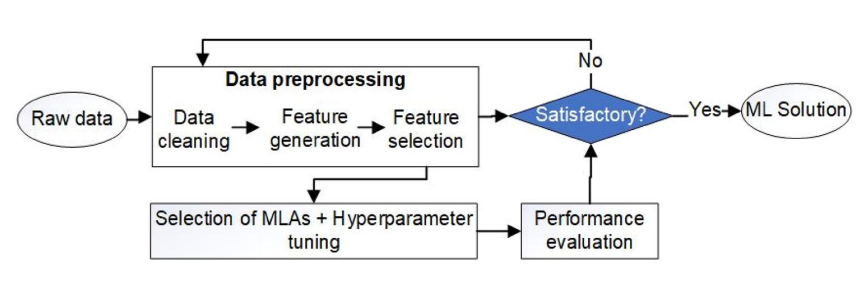

<a id='1.2'></a>
## 1.2. Mechanistic modeling


<a id='1.2.1'></a>
### 1.2.1. Biowin (Envirosim LTD)

<a id='2'></a>
# 2. Dataset preparation



<a id='2.1'></a>
## 2.1. Activated Sludge (AS) Biological Nutrient Removal (BNR)

Plant conditions:
100% biological treatment
Aeration: DO = 2 mg/L (for first step, and [0.5;5] later)
Temperature = 20 dgreeC
Sludge return/recirculation = 100 MLD
Waste sludge = 3.43 MLD


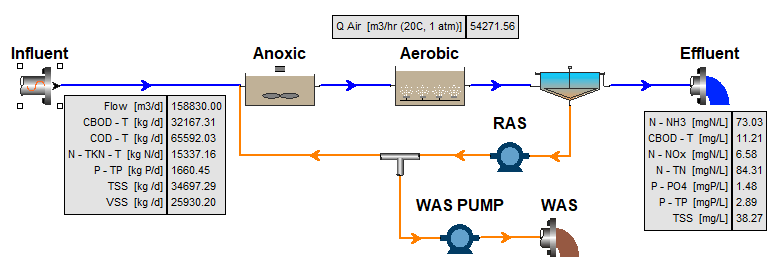

<a id='1'></a>
# Part 2. Install Python Packages

<a id='1.1'></a>
## 2.1. Install packages

<a id='1.2'></a>
## 2.2. A list of Python packages
pandas

<a id='1.3'></a>
## 2.3. Import Packages

In [2]:
import pandas as pd
import numpy as np
import datetime
import os
import io

In [ ]:
!cat /etc/os-release

PRETTY_NAME="Ubuntu 22.04.3 LTS"
NAME="Ubuntu"
VERSION_ID="22.04"
VERSION="22.04.3 LTS (Jammy Jellyfish)"
VERSION_CODENAME=jammy
ID=ubuntu
ID_LIKE=debian
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
UBUNTU_CODENAME=jammy


<a id='1.4'></a>
## 2.4. Create Folders

<a id='2'></a>
# Part 3. Download Data

<a id='3.1'></a>
## 3.1. Download Datasets

Clone NeuroBioWinWasteWater project

In [3]:
!rm -fr NeuroBioWinWasteWater
!git clone https://github.com/Fezzahraoui/Biowin-vs-ML-project

Cloning into 'Biowin-vs-ML-project'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (6/6), 10.05 MiB | 10.39 MiB/s, done.


Read Biowin generated dataset

In [4]:
import pandas as pd

# Define the path to the raw file
file_path = 'https://raw.githubusercontent.com/Fezzahraoui/Biowin-vs-ML-project/main/Biowin_Generated_Dataset_11_11-2023.xls'

# Use pandas to read a specific sheet from the Excel file
df = pd.read_excel(file_path, sheet_name='dataset')

# Display the first few rows of the DataFrame
print(df.head())


     Qinf  infCOD     infBOD  infTKN  infP   infNH3     infTSS     infVSS  \
0  128140  283.43  138.99831   69.38  3.59  45.7908  152.32711  112.04711   
1  128140  283.43  138.99831   69.38  3.59  45.7908  152.32711  112.04711   
2  128140  283.43  138.99831   69.38  3.59  45.7908  152.32711  112.04711   
3  128140  283.43  138.99831   69.38  3.59  45.7908  152.32711  112.04711   
4  128140  283.43  138.99831   69.38  3.59  45.7908  152.32711  112.04711   

      infpH     effTSS  ...      effTN     effNH3     effNO3    Qeff  \
0  6.059946  29.550550  ...  66.919115  36.757817  17.318748  130110   
1  6.059946  22.729632  ...  66.466055  36.647526  17.337257  124710   
2  6.059946  22.529259  ...  66.227638  36.349003  17.439043  124710   
3  6.059946  22.535177  ...  65.722992  35.838260  17.549413  124710   
4  6.059946  22.534503  ...  64.993405  35.170694  17.632861  124710   

      effVSS    effNO2     effCOD    effBOD     wasTSS     wasVSS  
0  19.877068  8.556299  51.008106  9

<a id='3'></a>
# Part 4. Preprocess Data

 Parameters such as Total Suspended Solids (TSS) and pH were excluded from the model. TSS was dropped
because it showed a high correlation with both COD and BOD, suggesting that its predictive information was already
captured by these other attributes. The pH level was omitted due to its negligible variation across the dataset, which
translated into a low impact on ammonia prediction in this context.
3


<a id='4.1'></a>
## 4.1. Exploratory Data Analysis

<a id='4.2'></a>
## 4.2. Feature variables and target variable

---



**Defining feature variables and target variable**

The model will serve to predict effluent TSS using influent data such as the flow rate, BOD, COD, TKN, TSS, VSS, and pH.


In [5]:
columns_to_keep = ['Qinf','infNH3','infCOD','infP']
X = df[columns_to_keep]
y = df['effNH3']

# Display the first few rows of the DataFrame
print(y.head())
print(X.head())


0    36.757817
1    36.647526
2    36.349003
3    35.838260
4    35.170694
Name: effNH3, dtype: float64
     Qinf   infNH3  infCOD  infP
0  128140  45.7908  283.43  3.59
1  128140  45.7908  283.43  3.59
2  128140  45.7908  283.43  3.59
3  128140  45.7908  283.43  3.59
4  128140  45.7908  283.43  3.59


<a id='4.3'></a>
## 4.3. Train/Test Split

Splitting data into training and testing sets

Create training and testing sets

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Create training and validation sets

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

In [8]:
print(f'X_train size: {X_train.shape}')
print(f'X_val size: {X_val.shape}')
print(f'X_test size: {X_test.shape}')
print(f'y_train size: {y_train.shape}')
print(f'y_val size: {y_val.shape}')
print(f'y_test size: {y_test.shape}')

X_train size: (39321, 4)
X_val size: (13107, 4)
X_test size: (13107, 4)
y_train size: (39321,)
y_val size: (13107,)
y_test size: (13107,)


<a id='4.3'></a>
## 4.3. Data visualisation

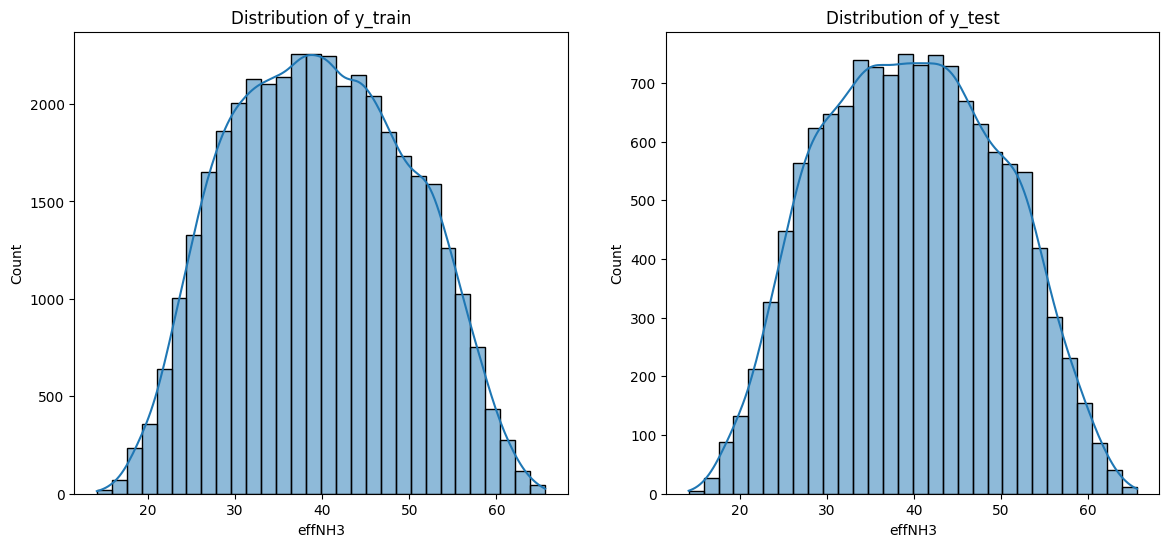

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(y_train, bins=30, kde=True)
plt.title('Distribution of y_train')

plt.subplot(1, 2, 2)
sns.histplot(y_test, bins=30, kde=True)
plt.title('Distribution of y_test')

plt.show()


In [13]:
# Add day collumn
df.insert(0, 'day', range(1, len(df) + 1))

<a id='4'></a>
# Part 5. Build and Train a Model

<a id='5.1'></a>
## 5.1. Linear regression model

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
# Creating a linear regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Predicting the values for the testing set
predictions = model.predict(X_test)

# Calculating the model's error
mse = mean_squared_error(y_test, predictions)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (Coefficient of Determination)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (Coefficient of Determination): {r2}')



Mean Squared Error (MSE): 65.72314346197
Mean Absolute Error (MAE): 6.408366199755053
Root Mean Squared Error (RMSE): 8.10698115589089
R-squared (Coefficient of Determination): 0.35719921443148694


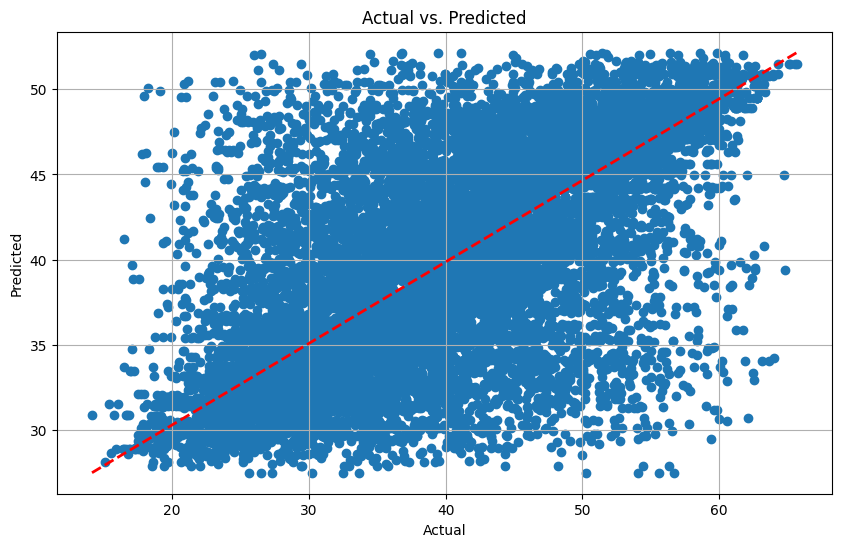

In [11]:
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.plot([min(y_test), max(y_test)], [min(predictions), max(predictions)], color='red', linestyle='--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.grid(True)
plt.show()


<a id='5.2'></a>
## 5.2. Deep Learning

<a id='5.2.1'></a>
## 5.2.1.  Simple Recurrent Neural Networks (RNN)

Epoch 1/100
1229/1229 [==============================] - 11s 8ms/step - loss: 554.4207 - val_loss: 99.4434
Epoch 2/100
1229/1229 [==============================] - 8s 6ms/step - loss: 77.0007 - val_loss: 65.8501
Epoch 3/100
1229/1229 [==============================] - 8s 6ms/step - loss: 67.5913 - val_loss: 64.0942
Epoch 4/100
1229/1229 [==============================] - 4s 3ms/step - loss: 66.6127 - val_loss: 63.5385
Epoch 5/100
1229/1229 [==============================] - 3s 3ms/step - loss: 66.2175 - val_loss: 63.3445
Epoch 6/100
1229/1229 [==============================] - 4s 3ms/step - loss: 65.9378 - val_loss: 63.1944
Epoch 7/100
1229/1229 [==============================] - 4s 3ms/step - loss: 65.8257 - val_loss: 62.8975
Epoch 8/100
1229/1229 [==============================] - 3s 3ms/step - loss: 65.7520 - val_loss: 62.8781
Epoch 9/100
1229/1229 [==============================] - 3s 3ms/step - loss: 65.6406 - val_loss: 62.7076
Epoch 10/100
1229/1229 [=============================

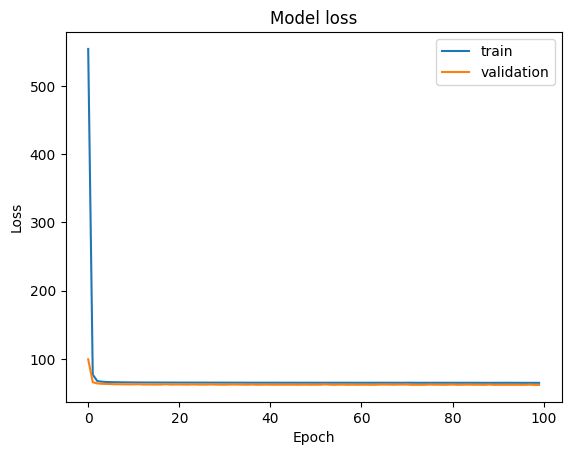

In [137]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Standardize the data (important for neural networks)
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and validation data
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# RNNs expect 3D input: [samples, time steps, features]
# Here we have a single feature per time step
X_train_rnn = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_val_rnn = X_val_scaled.reshape((X_val_scaled.shape[0], 1, X_val_scaled.shape[1]))
X_test_rnn = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Define the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, activation='relu', input_shape=(1, X_train_scaled.shape[1])))
model.add(Dense(1))

# Compile the model with a suitable optimizer and loss function for regression
optimizer = Adam(learning_rate=0.001) # You might want to tune this
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model, including validation data to monitor overfitting
history = model.fit(
    X_train_rnn, y_train,
    epochs=100,  # Number of epochs should be chosen based on when validation error stabilizes
    batch_size=32,
    validation_data=(X_val_rnn, y_val)
)

# Predict on the test set
y_pred = model.predict(X_test_rnn).flatten()

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'RNN Mean Squared Error (MSE): {mse}')
print(f'RNN Mean Absolute Error (MAE): {mae}')
print(f'RNN Root Mean Squared Error (RMSE): {rmse}')
print(f'RNN R-squared (Coefficient of Determination): {r2}')

# Optional: Plot training & validation loss to diagnose overfitting/underfitting
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


Plot RNN

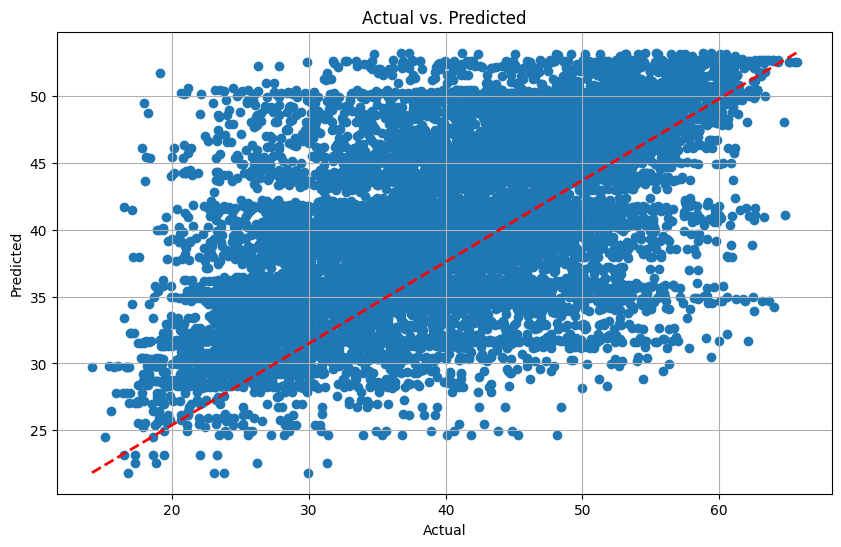

In [19]:
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.plot([min(y_test), max(y_test)], [min(predictions), max(predictions)], color='red', linestyle='--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.grid(True)
plt.show()

The previous RNN model performance
RNN Mean Squared Error (MSE): 64.92863849914792
RNN Mean Absolute Error (MAE): 6.291187580551532
RNN Root Mean Squared Error (RMSE): 8.05783088052535
RNN R-squared (Coefficient of Determination): 0.36496981679982354

In [ ]:
!pip install keras-tuner


## RNN model tuning

In [18]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.models import load_model
import numpy as np

# Define a function to build the model
def build_model(rnn_units=50, activation='relu', dropout_rate=0.2, learning_rate=0.001, epochs=100, batch_size=32):
    model = Sequential([
        SimpleRNN(rnn_units, activation=activation, input_shape=(1, X_train_scaled.shape[1])),
        Dropout(dropout_rate),
        Dense(1)
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model, epochs, batch_size

# Create the model with specific hyperparameters
model, epochs, batch_size = build_model(rnn_units=70, activation='tanh', dropout_rate=0.3, learning_rate=0.0005, epochs=100, batch_size=32)

# Implement Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Train the model with specified epochs and batch size
history = model.fit( X_train_rnn, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val_rnn, y_val),
    callbacks=[early_stopping]
)

# Save the trained model
model.save('rnn_model.h5')

# Print a message indicating that the model has been saved
print("RNN model saved as 'rnn_model.h5'")

# Load the saved RNN model
loaded_model = load_model('rnn_model.h5')

# Prepare your test data (X_test_rnn) and preprocess it
# Assuming you have already defined X_test_rnn as the preprocessed test data

# Make predictions using the loaded model
predictions = loaded_model.predict(X_test_rnn).flatten()

# Now, 'predictions' contains the predicted values for your test data
# You can use 'predictions' for further analysis or evaluation


NameError: ignored

***Best*** model loading

In [ ]:
from keras.models import load_model
import numpy as np

# Load the saved RNN model
loaded_model = load_model('rnn_model.h5')

# Prepare your test data (X_test_rnn) and preprocess it
# Assuming you have already defined X_test_rnn as the preprocessed test data

# Make predictions using the loaded model
predictions = loaded_model.predict(X_test_rnn).flatten()

# Now, 'predictions' contains the predicted values for your test data
# You can use 'predictions' for further analysis or evaluation
# Evaluate the model
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

# Print the evaluation metrics
print(f'RNN Mean Squared Error (MSE): {mse}')
print(f'RNN Mean Absolute Error (MAE): {mae}')
print(f'RNN Root Mean Squared Error (RMSE): {rmse}')
print(f'RNN R-squared (Coefficient of Determination): {r2}')

# Optional: Plot training & validation loss to diagnose overfitting/underfitting
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

<a id='5.2.2'></a>
## 5.2.2. Long Short-Term Memory (LSTM)


LSTM (Long Short-Term Memory) networks offer several advantages over traditional RNNs (Recurrent Neural Networks), particularly in handling long-term dependencies in sequence data. Here's a breakdown of the key advantages:

1. **Handling Long-Term Dependencies**:
   - LSTM networks are specifically designed to address the issue of long-term dependencies, which traditional RNNs struggle with. They can remember information for long periods, which is crucial in many sequence modeling tasks like language modeling, time-series forecasting, etc.
   - RNNs suffer from the vanishing gradient problem, where gradients become too small for effective learning in long sequences. LSTMs mitigate this issue with their gating mechanisms.

2. **Gating Mechanisms**:
   - LSTMs have a sophisticated gating mechanism (comprising forget, input, and output gates) that regulates the flow of information. These gates determine what information is to be kept or discarded at each step of the sequence, allowing for more controlled and effective learning.
   - In contrast, traditional RNNs do not have these gating mechanisms and therefore cannot as easily regulate the flow of information across the network.

3. **Better Performance in Complex Tasks**:
   - Due to their ability to capture long-range dependencies, LSTMs often outperform RNNs in complex tasks that involve long sequences, such as speech recognition, machine translation, and text generation.
   - RNNs are generally more suited for simpler tasks with shorter sequence dependencies.

4. **Robustness to Gap Length**:
   - LSTMs can handle sequences with varying lengths and are particularly robust when dealing with gaps of unknown duration between important events in a sequence.
   - Traditional RNNs, on the other hand, often struggle with increasing gaps.

5. **Higher Flexibility**:
   - LSTMs can be used in more complex architectures such as bidirectional LSTMs and can be stacked as deep networks, which makes them very flexible for a wide range of tasks.
   - While RNNs can also be used in similar architectures, they are less effective due to their inherent limitations in processing long sequences.

6. **More Effective in Learning Sequences**:
   - In practice, LSTMs are often more effective in learning from sequence data, as they can capture both the short-term and long-term relationships in the data, which is a key requirement in many sequence learning tasks.

However, it's important to note that LSTMs are also more computationally intensive than traditional RNNs due to their complex architecture. This means they require more training time and resources, which can be a drawback in scenarios where computational efficiency is a priority. Despite this, in many real-world applications, the advantages of LSTMs in handling sequential data far outweigh their computational cost.

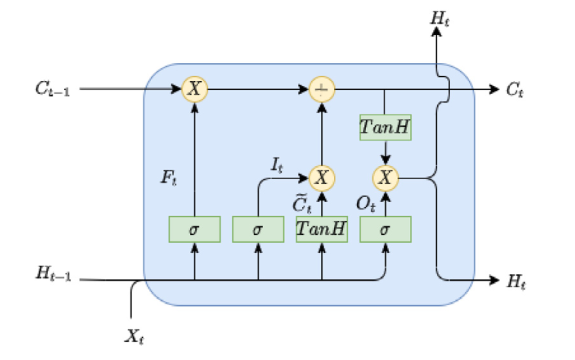

Figure. The architecture of an LSTM cell

<a id='5.2.3'></a>
## 5.2.3. LSTM model creation, fine-tuning, and loading

In [ ]:
!pip install keras-tuner
import tensorflow as tf
import kerastuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
# ... (Include other necessary imports and data preprocessing steps here) ...
#to normalize the dataset before applying LSTM:
from sklearn.preprocessing import MinMaxScaler #and create a scaler object:
scaler = MinMaxScaler(feature_range=(0, 1))

#fit the scaler to my data:
scaler.fit(X_train)
#transform both training and test sets:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a function that creates the LSTM model with varying hyperparameters
def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units', min_value=32, max_value=512, step=32),
                   return_sequences=True,
                   input_shape=(X_train_scaled.shape[1], 1),
                   activation=hp.Choice('activation', values=['relu', 'tanh', 'sigmoid', 'softplus'])))
    model.add(LSTM(units=hp.Int('units', min_value=32, max_value=512, step=32),
                   activation=hp.Choice('activation', values=['relu', 'tanh', 'sigmoid', 'softplus'])))
    model.add(Dense(1, activation='linear'))

    model.compile(optimizer=Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
                  loss='mean_squared_error')
    return model

# Create a tuner
tuner = kt.Hyperband(
    build_model,
    objective='val_loss',
    max_epochs=100,
    hyperband_iterations=2,
    directory='my_dir',
    project_name='lstm_tuning')

# Early stopping callback
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Start the tuning process
tuner.search(X_train_scaled, y_train,
             epochs=50,
             validation_split=0.2,
             callbacks=[stop_early])

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The best number of units in the first and second LSTM layers: {best_hps.get('units')}
The best activation function: {best_hps.get('activation')}
The best learning rate for the optimizer: {best_hps.get('learning_rate')}
""")

# Build the model with the best hyperparameters
model = tuner.hypermodel.build(best_hps)
epochs = best_hps.get('epochs') if 'epochs' in best_hps.values else 50  # Set a default value if not included in tuning
batch_size = best_hps.get('batch_size') if 'batch_size' in best_hps.values else 32  # Set a default value if not included in tuning

# Train the model
model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# Evaluate the model on the test data
test_loss = model.evaluate(X_test_scaled, y_test)
print("Test Loss: ", test_loss)

# Make predictions
predictions = model.predict(X_test_scaled)

# Calculate additional metrics
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (Coefficient of Determination): {r2}")

# Save the model
model.save('my_lstm_model.h5')


Trial 194 Complete [00h 01m 03s]
val_loss: 65.97724914550781

Best val_loss So Far: 65.23552703857422
Total elapsed time: 11h 52m 30s

Search: Running Trial #195

Value             |Best Value So Far |Hyperparameter
160               |160               |units
relu              |relu              |activation
0.0001321         |0.0030996         |learning_rate
12                |100               |tuner/epochs
4                 |34                |tuner/initial_epoch
3                 |4                 |tuner/bracket
1                 |4                 |tuner/round
0161              |0145              |tuner/trial_id

Epoch 5/12
 11/983 [..............................] - ETA: 27s - loss: 68.9404

In [ ]:
from google.colab import files
files.download('my_lstm_model.h5')

In [ ]:
!ls

**Loading the best LSTM model**

In [ ]:

 import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.preprocessing import MinMaxScaler #and create a scaler object:
scaler = MinMaxScaler(feature_range=(0, 1))

#fit the scaler to my data:
scaler.fit(X_train)
#transform both training and test sets:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ... (Include other necessary imports and data preprocessing steps here) ...

# Load the saved model
model = tf.keras.models.load_model('my_lstm_model.h5')

# Assuming you have new data to predict (new_X), preprocess it similarly to your training data
# Example:
# scaler = MinMaxScaler(feature_range=(0, 1))
# scaler.fit(train_data)  # Fit on the training data
# new_X_scaled = scaler.transform(new_X)  # Transform the new data

# Make predictions
predictions = model.predict(new_X_scaled)
# Calculating the model's error
mseLSTM = mean_squared_error(y_test, predictions)
maeLSTM = mean_absolute_error(y_test, predictions)
rmseLSTM = np.sqrt(mseLSTM)
r2LSTM = r2_score(y_test, predictions)

print(f'Mean Squared Error (MSE)  : {mseLSTM}')
print(f'Mean Absolute Error (MAE)  : {maeLSTM}')
print(f'Root Mean Squared Error (RMSE): {rmseLSTM}')
print(f'R-squared (Coefficient of Determination): {r2LSTM}')




### Best LSTM model (run in case the best model is not loaded)

In [15]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, LeakyReLU
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Assuming X_train, y_train, X_test, y_test are already preprocessed and ready for LSTM
# ...

# Normalize the dataset before applying LSTM:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshaping input data for LSTM
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Creating the LSTM model with LeakyReLU
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_scaled.shape[1], 1)))
model.add(LeakyReLU(alpha=0.05))
model.add(LSTM(units=50))
model.add(LeakyReLU(alpha=0.05))
model.add(Dense(1, activation='linear'))

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32)

# Predicting the values for the testing set
predictions = model.predict(X_test_scaled)

# Calculating the model's error
mseLSTM = mean_squared_error(y_test, predictions)
maeLSTM = mean_absolute_error(y_test, predictions)
rmseLSTM = np.sqrt(mseLSTM)
r2LSTM = r2_score(y_test, predictions)

print(f'Mean Squared Error (MSE) for LSTM: {mseLSTM}')
print(f'Mean Absolute Error (MAE) for LSTM: {maeLSTM}')
print(f'Root Mean Squared Error (RMSE): {rmseLSTM}')
print(f'R-squared (Coefficient of Determination): {r2LSTM}')




Epoch 1/100
1229/1229 [==============================] - 17s 10ms/step - loss: 663.1227
Epoch 2/100
1229/1229 [==============================] - 11s 9ms/step - loss: 140.3569
Epoch 3/100
1229/1229 [==============================] - 10s 8ms/step - loss: 102.6742
Epoch 4/100
1229/1229 [==============================] - 11s 9ms/step - loss: 102.2984
Epoch 5/100
1229/1229 [==============================] - 12s 10ms/step - loss: 102.3000
Epoch 6/100
1229/1229 [==============================] - 11s 9ms/step - loss: 101.6488
Epoch 7/100
1229/1229 [==============================] - 10s 8ms/step - loss: 69.8541
Epoch 8/100
1229/1229 [==============================] - 11s 9ms/step - loss: 67.0969
Epoch 9/100
1229/1229 [==============================] - 12s 10ms/step - loss: 66.7316
Epoch 10/100
1229/1229 [==============================] - 20s 16ms/step - loss: 66.8735
Epoch 11/100
1229/1229 [==============================] - 12s 9ms/step - loss: 66.7151
Epoch 12/100
1229/1229 [==================

**Visualisation**

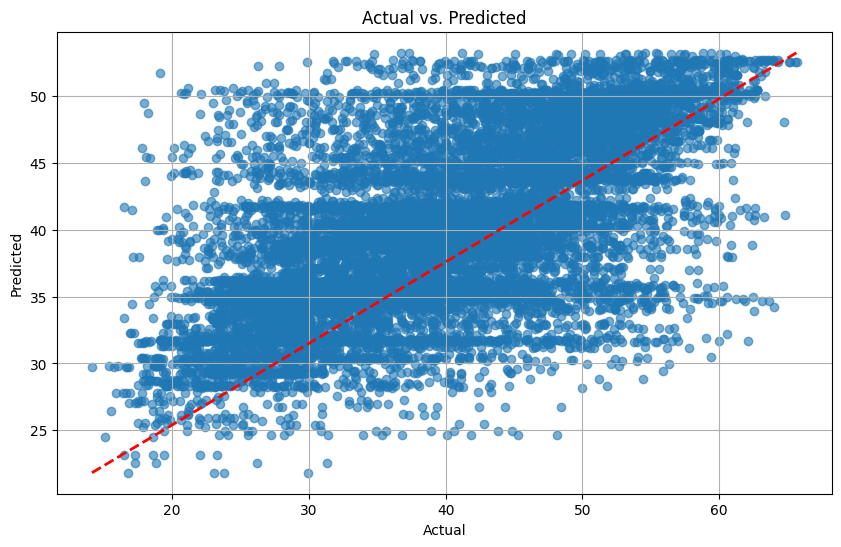

In [17]:
import matplotlib.pyplot as plt
import tensorflow as tf
#import kerastuner as kt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.6)  # Alpha added for better visibility if points overlap
plt.plot([min(y_test), max(y_test)], [min(predictions), max(predictions)], color='red', linestyle='--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.grid(True)
plt.show()


The scatter plot shows a comparison of actual vs. predicted values from a model, with a red dashed line indicating the ideal 1:1 relationship where predicted values match the actual ones perfectly. The overall trend appears to be linear, suggesting that the model's predictions are correlated with the actual values
*Feature Engineering:* The The relevat features were included so the LSTM captures the patterns between the influent and effluent parameters. for the LSTM model, the dataset was normalised to values between 0 and 1 prior to the traning for the best LSTM performance.
*Hyperparameters Tuning:*  While experimenting with the number of LSTM units, we tried to increasing and decreasing the number to see if it captures the patters better. The number of layers was also increased to test if more complex patterns can be captured. In another step, we also trained the LSTM model using the log-transformed target data

Let's save the LSTM model

In [ ]:
mkdir -p models

In [ ]:
ls -l

In [ ]:
rm -fr service.yaml ww_biowin_lstm.h5 lstm.h5 Dockerfile Dockerfile app.py

In [ ]:
# Define the model filename
lstm_model_filename = 'deploy/ww_biowin_lstm.h5'

# Save the trained model
model.save(lstm_model_filename)

<a id='5.2.4'></a>
## 5.2.4. Results

Please refer to the paper

<a id='6'></a>
# Part 6. Deployment into the cloud

A cloud-based infrastructure was designed and successfully implemented on the AWS platform, leveraging a multi-component architecture to support a web application. The key components include an Elastic Kubernetes Service (EKS) for orchestration, Elastic Container Registry (ECR) for Docker image storage, and EC2 instances to serve as worker nodes where the Flask app is running the AS LSTM model prediction.

The domain wastewaterai.com was configured with the necessary DNS records to point to the EC2 web server's Elastic IP.




```
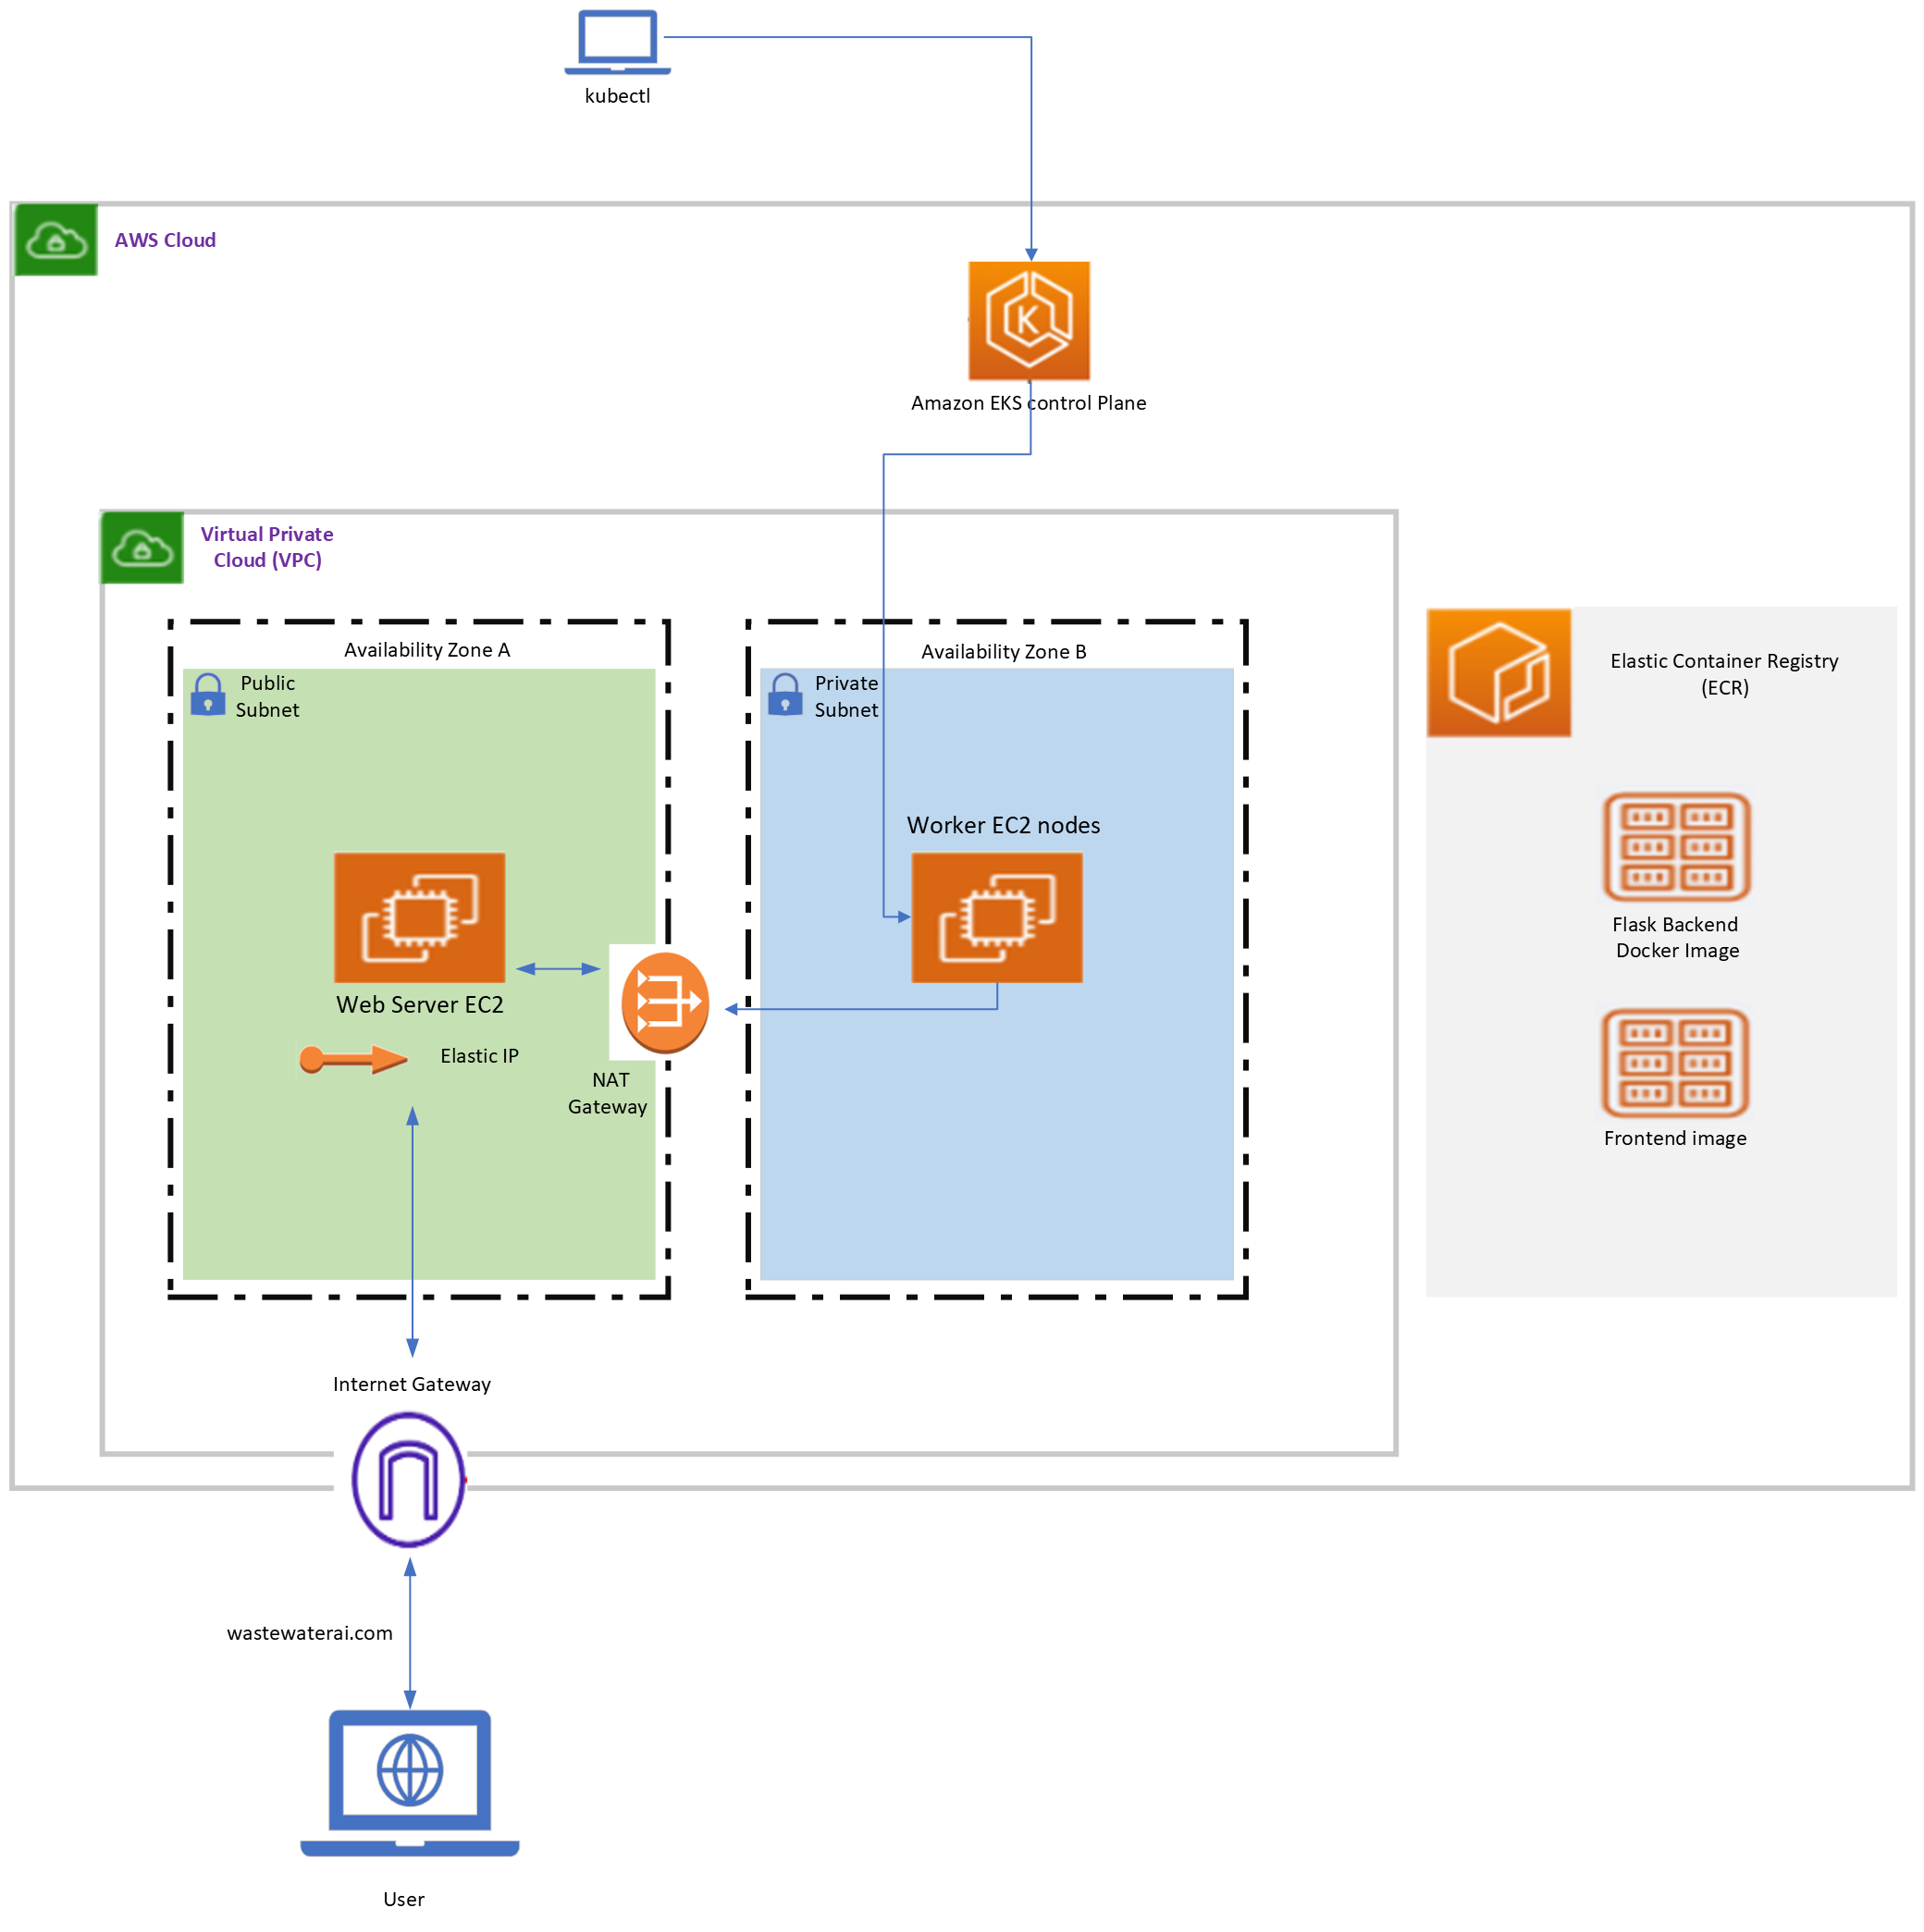

